Index(['model_type', 'model_name', 'dataset', 'avg_latency_sec',
       'average_string_match_percentage'],
      dtype='object')

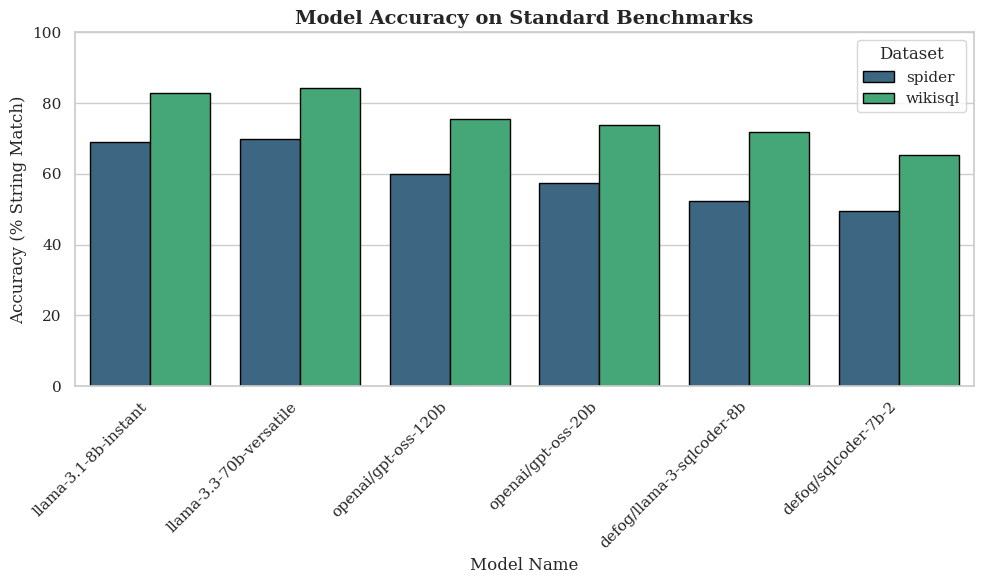

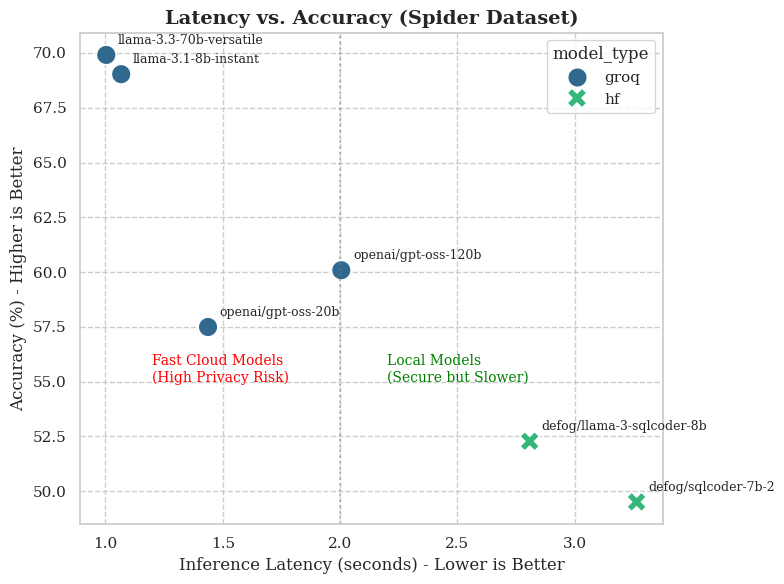

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your data
# Ideally, upload your csv. Here I create it from your file content for reproducibility
df = pd.read_csv('summary_metrics.csv')
display(df.columns)

# Set IEEE-like style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# --- CHART 1: ACCURACY COMPARISON (Spider vs WikiSQL) ---
plt.figure(figsize=(10, 6))
chart = sns.barplot(
    data=df,
    x="model_name",
    y="average_string_match_percentage",
    hue="dataset",
    palette="viridis",
    edgecolor="black"
)
plt.title("Model Accuracy on Standard Benchmarks", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy (% String Match)", fontsize=12)
plt.xlabel("Model Name", fontsize=12)
plt.ylim(0, 100)
plt.legend(title="Dataset")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Fig2_Accuracy_Comparison.png", dpi=300)
plt.show()

# --- CHART 2: LATENCY VS ACCURACY (The "Why We Need Fine-Tuning" Plot) ---
# We filter for just SPIDER dataset as it's the harder/more relevant one
spider_df = df[df['dataset'] == 'spider']
wiki_df = df[df['dataset'] == 'wikisql']

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=spider_df,
    x="avg_latency_sec",
    y="average_string_match_percentage",
    hue="model_type",
    style="model_type",
    s=200, # Marker size
    palette="viridis"
)

# Annotate points
for i in range(spider_df.shape[0]):
    plt.text(
        spider_df.avg_latency_sec.iloc[i]+0.05,
        spider_df.average_string_match_percentage.iloc[i]+0.5,
        spider_df.model_name.iloc[i],
        fontsize=9
    )

plt.title("Latency vs. Accuracy (Spider Dataset)", fontsize=14, fontweight='bold')
plt.xlabel("Inference Latency (seconds) - Lower is Better", fontsize=12)
plt.ylabel("Accuracy (%) - Higher is Better", fontsize=12)
plt.grid(True, linestyle='--')

# Add region labels
plt.axvline(x=2.0, color='gray', linestyle=':', alpha=0.5)
plt.text(1.2, 55, "Fast Cloud Models\n(High Privacy Risk)", color='red', fontsize=10)
plt.text(2.2, 55, "Local Models\n(Secure but Slower)", color='green', fontsize=10)

plt.tight_layout()
plt.savefig("Fig3_Latency_Tradeoff.png", dpi=300)
plt.show()